In [37]:
%matplotlib inline

import os
import glob

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

PLOT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [38]:
SIM_SOFTWARE = 'ZHAireS'
SIM_TAG      = 'DC2.1rc2'
THRESH       = 50 # ADC counts
POL          = 'XY'

PRESEL_BASEDIR = '/sps/grand/pcorrea/nutrig/template/v2/preselection'
PRESEL_DIR     = os.path.join(PRESEL_BASEDIR,f'{SIM_SOFTWARE}_{SIM_TAG}_{POL}_THRESH_{THRESH}')

PRESEL_FILES = sorted( glob.glob( os.path.join(PRESEL_DIR,'*.npz') ) )

PLOT_TITLE = f'Template preselection, POL = {POL}, THRESH = {THRESH}'
PLOT_SUPTITLE = f'{SIM_SOFTWARE} {SIM_TAG}'

In [ ]:
templates = np.zeros((0,100))
omega     = np.zeros((0,))
omega_c   = np.zeros((0,))
energy    = np.zeros((0,))
zenith    = np.zeros((0,))
azimuth   = np.zeros((0,))
event_number = np.zeros((0,))
run_number = np.zeros((0,))


for file in PRESEL_FILES:
    print(file)
    with np.load(file) as f:
        templates = np.concatenate((templates,f['templates']))
        omega     = np.concatenate((omega,f['omega']))
        omega_c   = np.concatenate((omega_c,f['omega_c']))
        energy    = np.concatenate((energy,f['energy']))
        zenith    = np.concatenate((zenith,f['zenith']))
        azimuth   = np.concatenate((azimuth,f['azimuth']))
        event_number = np.concatenate((event_number,f['event_number']))
        run_number = np.concatenate((run_number,f['run_number']))

/sps/grand/pcorrea/nutrig/template/v2/preselection/ZHAireS_DC2.1rc2_XY_THRESH_50/preselection_templates_adc_11826-14074_L1_0000.npz
/sps/grand/pcorrea/nutrig/template/v2/preselection/ZHAireS_DC2.1rc2_XY_THRESH_50/preselection_templates_adc_13056-158_L1_0000.npz
/sps/grand/pcorrea/nutrig/template/v2/preselection/ZHAireS_DC2.1rc2_XY_THRESH_50/preselection_templates_adc_132-1786_L1_0000.npz
/sps/grand/pcorrea/nutrig/template/v2/preselection/ZHAireS_DC2.1rc2_XY_THRESH_50/preselection_templates_adc_15220-19778_L1_0000.npz
/sps/grand/pcorrea/nutrig/template/v2/preselection/ZHAireS_DC2.1rc2_XY_THRESH_50/preselection_templates_adc_15388-15096_L1_0000.npz
/sps/grand/pcorrea/nutrig/template/v2/preselection/ZHAireS_DC2.1rc2_XY_THRESH_50/preselection_templates_adc_16634-15816_L1_0000.npz
/sps/grand/pcorrea/nutrig/template/v2/preselection/ZHAireS_DC2.1rc2_XY_THRESH_50/preselection_templates_adc_266-494_L1_0000.npz
/sps/grand/pcorrea/nutrig/template/v2/preselection/ZHAireS_DC2.1rc2_XY_THRESH_50/pres

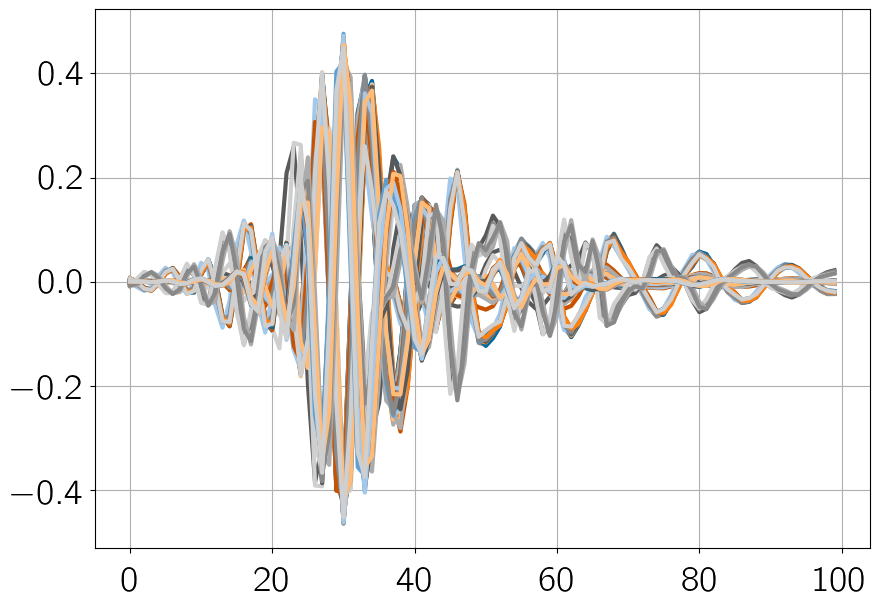

In [45]:
for template in templates[300:400]:
    plt.plot(template)

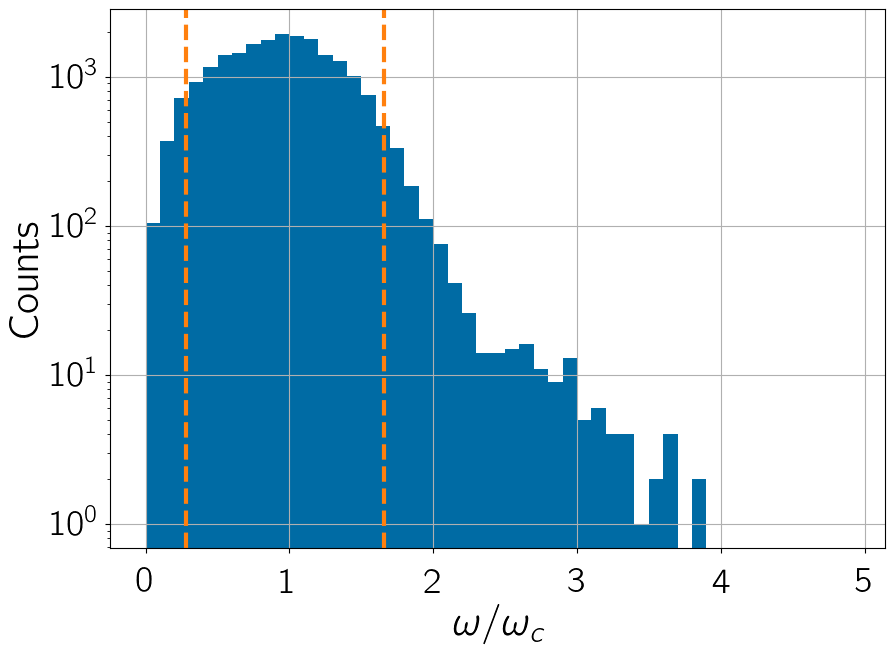

In [41]:
omega_ratio = omega/omega_c
quantile    = np.quantile(omega_ratio,[0.05,0.95]) #0.66

plt.hist(omega_ratio,bins=np.arange(0,5,.1))
plt.axvline(quantile[0],ls='--',color=PLOT_COLORS[1])
plt.axvline(quantile[1],ls='--',color=PLOT_COLORS[1])
plt.yscale('log')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel('Counts')
plt.show()

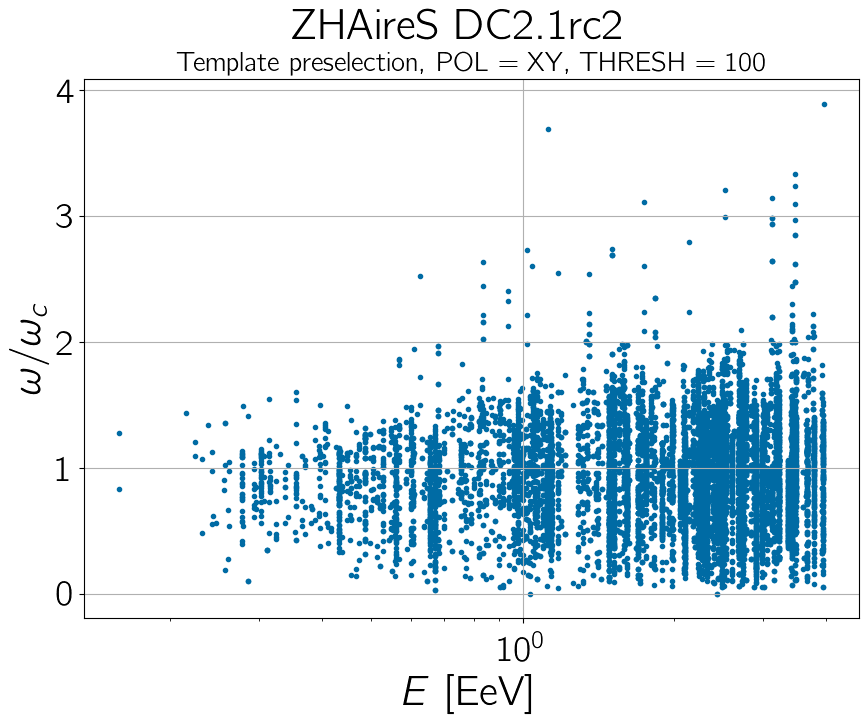

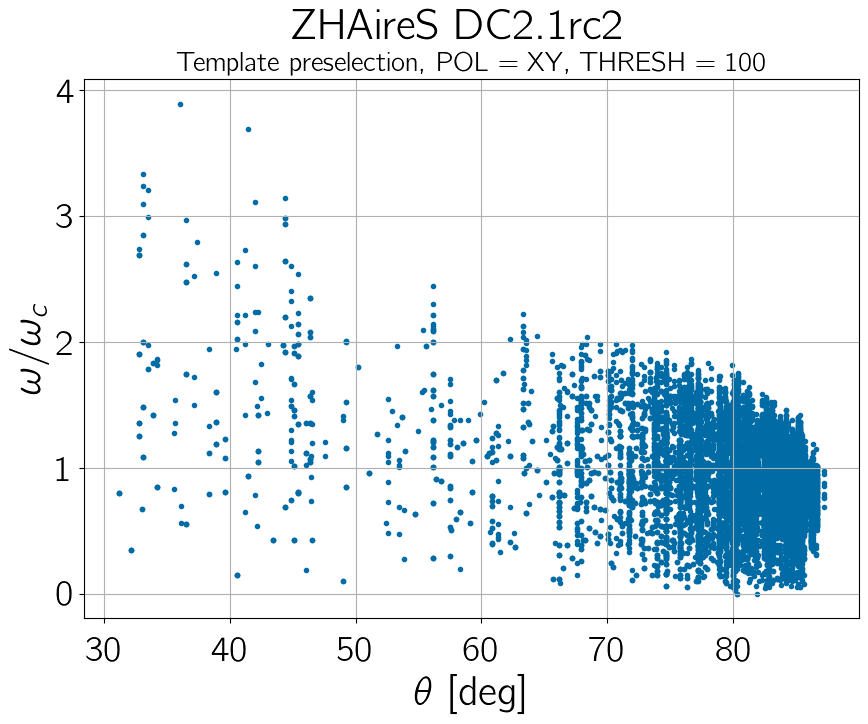

In [34]:
plt.scatter(energy/1e9,omega_ratio)
plt.xscale('log')
plt.xlabel(r'$E$ [EeV]')
plt.ylabel(r'$\omega/\omega_c$')
plt.title(PLOT_TITLE,fontsize=20)
plt.suptitle(PLOT_SUPTITLE)
plt.show()

plt.scatter(zenith,omega_ratio)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\omega/\omega_c$')
plt.title(PLOT_TITLE,fontsize=20)
plt.suptitle(PLOT_SUPTITLE)
plt.show()

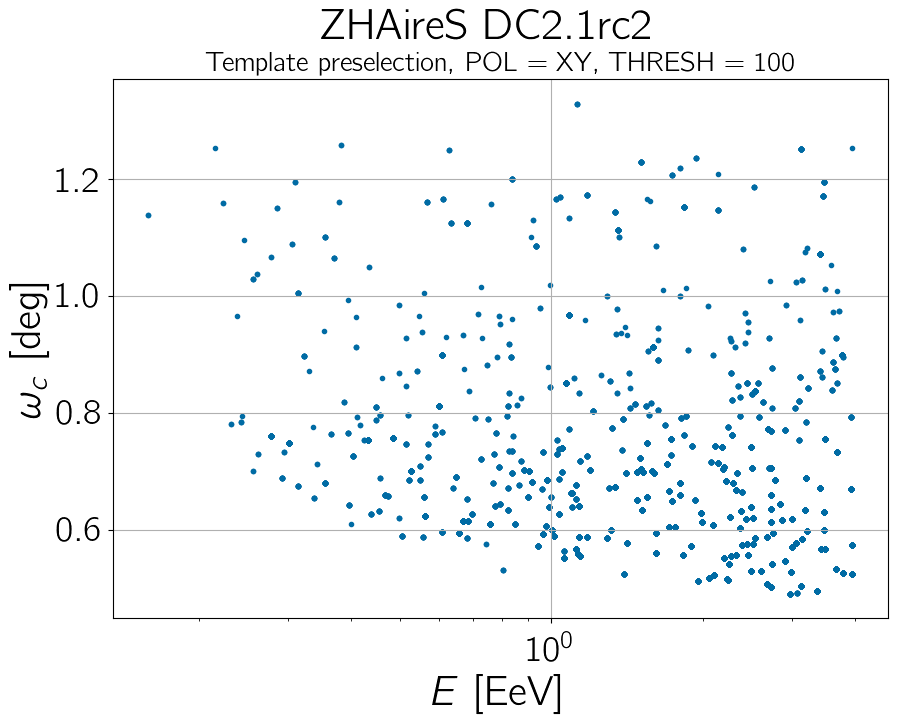

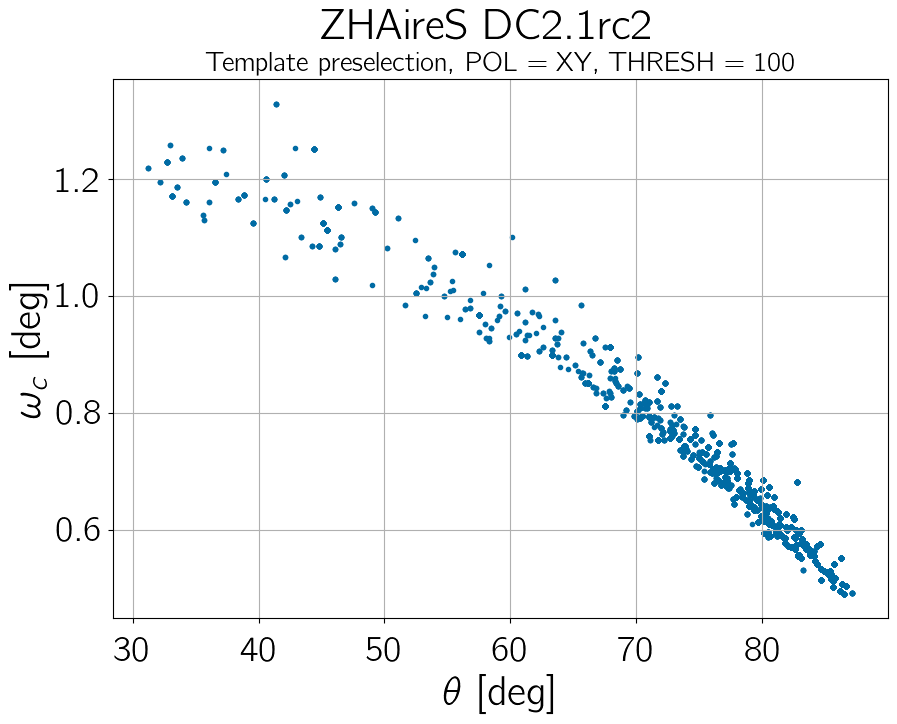

In [35]:
plt.scatter(energy/1e9,omega_c)
plt.xscale('log')
plt.xlabel(r'$E$ [EeV]')
plt.ylabel(r'$\omega_c$ [deg]')
plt.title(PLOT_TITLE,fontsize=20)
plt.suptitle(PLOT_SUPTITLE)
plt.show()

plt.scatter(zenith,omega_c)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\omega_c$ [deg]')
plt.title(PLOT_TITLE,fontsize=20)
plt.suptitle(PLOT_SUPTITLE)
plt.show()

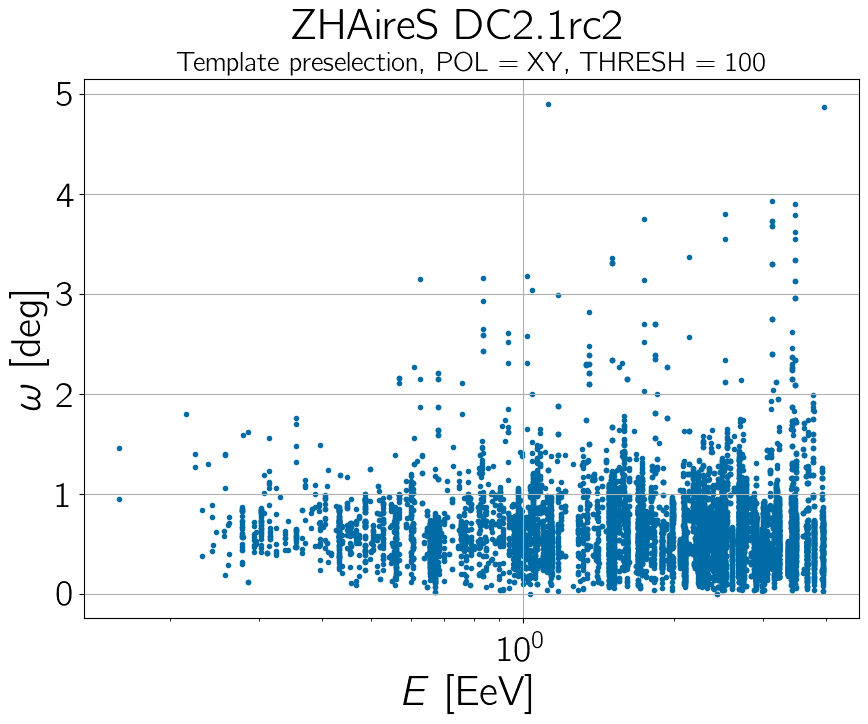

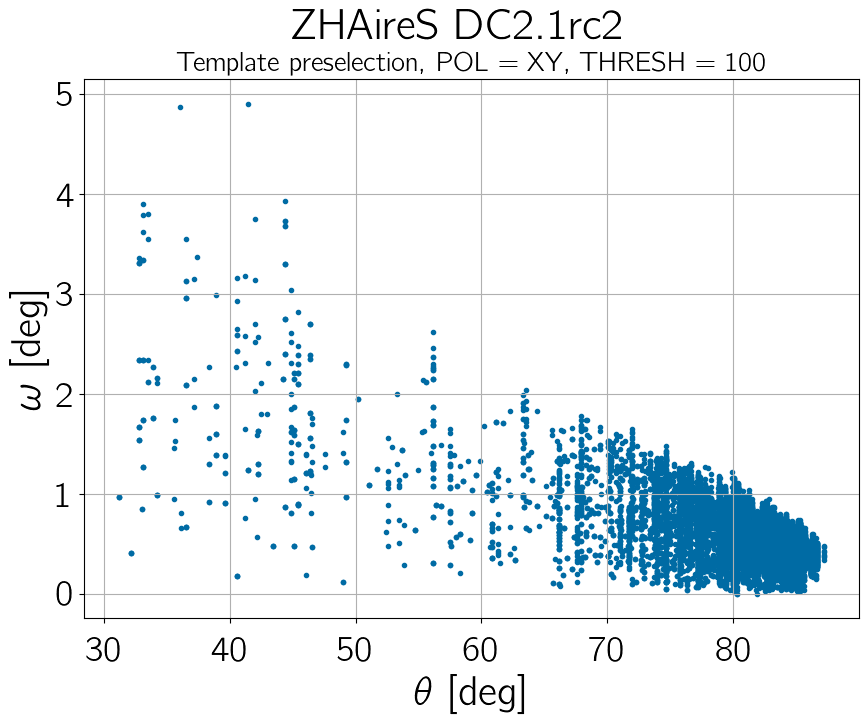

In [36]:
plt.scatter(energy/1e9,omega)
plt.xscale('log')
plt.xlabel(r'$E$ [EeV]')
plt.ylabel(r'$\omega$ [deg]')
plt.title(PLOT_TITLE,fontsize=20)
plt.suptitle(PLOT_SUPTITLE)
plt.show()

plt.scatter(zenith,omega)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\omega$ [deg]')
plt.title(PLOT_TITLE,fontsize=20)
plt.suptitle(PLOT_SUPTITLE)
plt.show()

In [39]:
bins[0:2]

array([0. , 0.2])